In [2]:
# Data Manupulation
import numpy as np
import pandas as pd
# Techinical Indicators
import talib as ta

In [3]:
# Plotting graphs
import matplotlib.pyplot as plt

In [4]:
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [5]:
# Data fetching
import pandas_datareader.data as web
import datetime as dt


In [6]:
start=dt.datetime(2000,1,1)
end=dt.datetime(2019,11,11)

In [7]:
df=web.DataReader('SPY','yahoo',start,end)

In [9]:
df=df.dropna()
df=df.iloc[:,:4]
df.head()

,High,Low,Open,Close
Date,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375
2000-01-04,144.06250,139.640625,143.53125,139.7500
2000-01-05,141.53125,137.250000,139.93750,140.0000
2000-01-06,141.50000,137.750000,139.62500,137.7500
2000-01-07,145.75000,140.062500,140.31250,145.7500


In [12]:
#10-days moving average, correlation, relative strength index (RSI),
#the difference between the open price of yesterday and today, difference close price of yesterday and open price of today

df['m10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['m10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]
df.head()

,High,Low,Open,Close,m10,Corr,RSI,Open-Close,Open-Open
Date,,,,,,,,,
2000-03-21,149.75000,144.50000,145.53125,149.18750,142.156250,0.872723,75.327068,-0.65625,-1.34375
2000-03-22,150.84375,148.68750,149.56250,150.09375,143.478125,0.868448,76.484411,0.37500,4.03125
2000-03-23,153.46875,149.15625,149.15625,152.65625,144.656250,0.907250,79.504822,-0.93750,-0.40625
2000-03-24,155.75000,151.71875,152.87500,153.56250,146.000000,0.907659,80.489556,0.21875,3.71875
2000-03-27,153.78125,151.81250,153.37500,151.93750,147.334375,0.864869,73.457737,-0.18750,0.50000


In [13]:
y = np.where (df['Close'].shift(-1) > df['Close'],1,-1)

In [14]:
split = int(0.7*len(df))

X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [15]:
model = LogisticRegression()

model = model.fit (X_train,y_train)

C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,High,[0.16704509317491265]
1,Low,[0.24298360206868114]
2,Open,[-0.19281894411017747]
3,Close,[-0.2574304348894692]
4,m10,[0.0393343321751898]
5,Corr,[-0.04237158292212573]
6,RSI,[0.0018797319312743358]
7,Open-Close,[0.08268012549670196]
8,Open-Open,[-0.027729455748177336]


In [18]:
probability = model.predict_proba(X_test)

print(probability)

[[0.48206014 0.51793986]
 [0.48786267 0.51213733]
 [0.47981464 0.52018536]
 ...
 [0.48081657 0.51918343]
 [0.5717529  0.4282471 ]
 [0.54352703 0.45647297]]


In [19]:
predicted = model.predict(X_test)

In [20]:
print(predicted)

[ 1  1  1 ...  1 -1 -1]


In [21]:
print(metrics.confusion_matrix(y_test, predicted))

[[294 382]
 [405 402]]


In [23]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.42      0.43      0.43       676
           1       0.51      0.50      0.51       807

    accuracy                           0.47      1483
   macro avg       0.47      0.47      0.47      1483
weighted avg       0.47      0.47      0.47      1483



The f1-score tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall. The support is the number of samples of the true response that lies in that class

In [24]:
print(model.score(X_test,y_test))

0.46931894807821983


Accuracy of 46,9%

In [25]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

print(cross_val)

print(cross_val.mean())

C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.54747475 0.53737374 0.53737374 0.53333333 0.56363636 0.55353535
 0.53643725 0.52941176 0.52332657 0.53752535]
0.5399428211374405


C:\Users\joaod\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


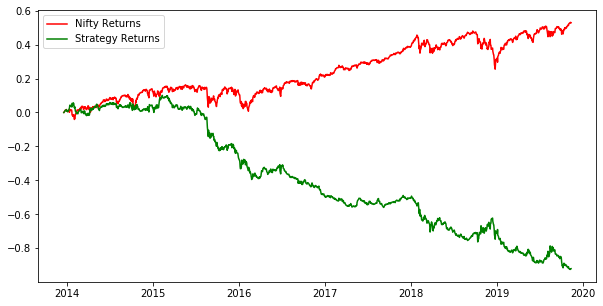

In [26]:
df['Predicted_Signal'] = model.predict(X)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])
df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()